In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
dataset = pd.read_csv('main_data.csv',index_col=0)
dataset.shape

(8711, 39)

#### No missing values in our dataset

<AxesSubplot:>

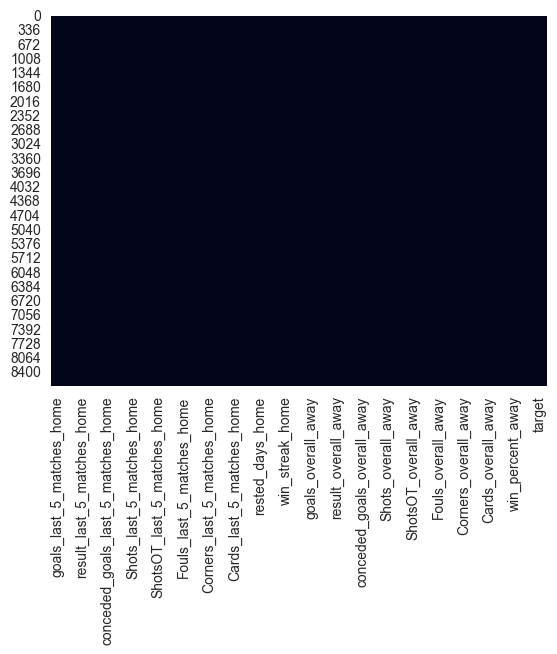

In [6]:
sns.heatmap(dataset.isna(),cbar=False)

In [8]:
all_float = all(dataset[col].dtype == 'float64' for col in dataset.columns)
if all_float:
    print("All columns are float")
else:
    print("Not all columns are float")

All columns are float


#### Target explanation :
##### 1 === The home team won the match
##### 2 === The match ended in a draw
##### 0 === The away team won the match

<AxesSubplot:xlabel='target', ylabel='count'>

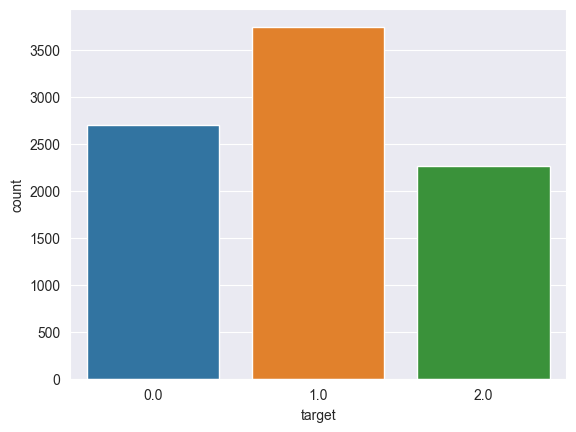

In [10]:
sns.countplot(x=dataset['target'])

#### The dataset is imbalanced , we should take that into consideration

Text(0.5, 1.0, 'Target Distribution')

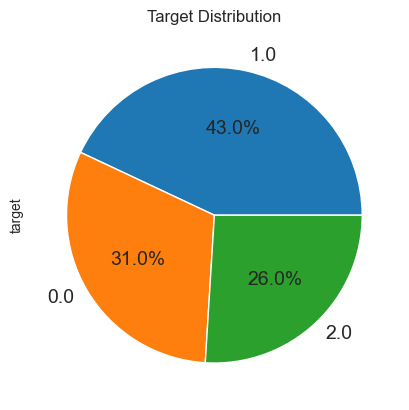

In [21]:
dataset['target'].value_counts().plot.pie(autopct='%1.1f%%',textprops={'fontsize': 14})
plt.title('Target Distribution')

In [46]:
features = dataset.columns.tolist()
features.remove('target')
print('We have ',len(features),' features')
home_features = features[:19]
away_features = features[19:]
print('We have ',len(home_features),' features for the home team')
print('We have ',len(away_features),' features for the away team')

We have  38  features
We have  19  features for the home team
We have  19  features for the away team


#### The features show a very good similarity with the tunisian league:
- Goals scored and conceded is centered around 1..1,5 which is similar to the tunisian league
- Result(the mean of a team points) is centered also around 1 => the majority of teams have close level

Home Team Features


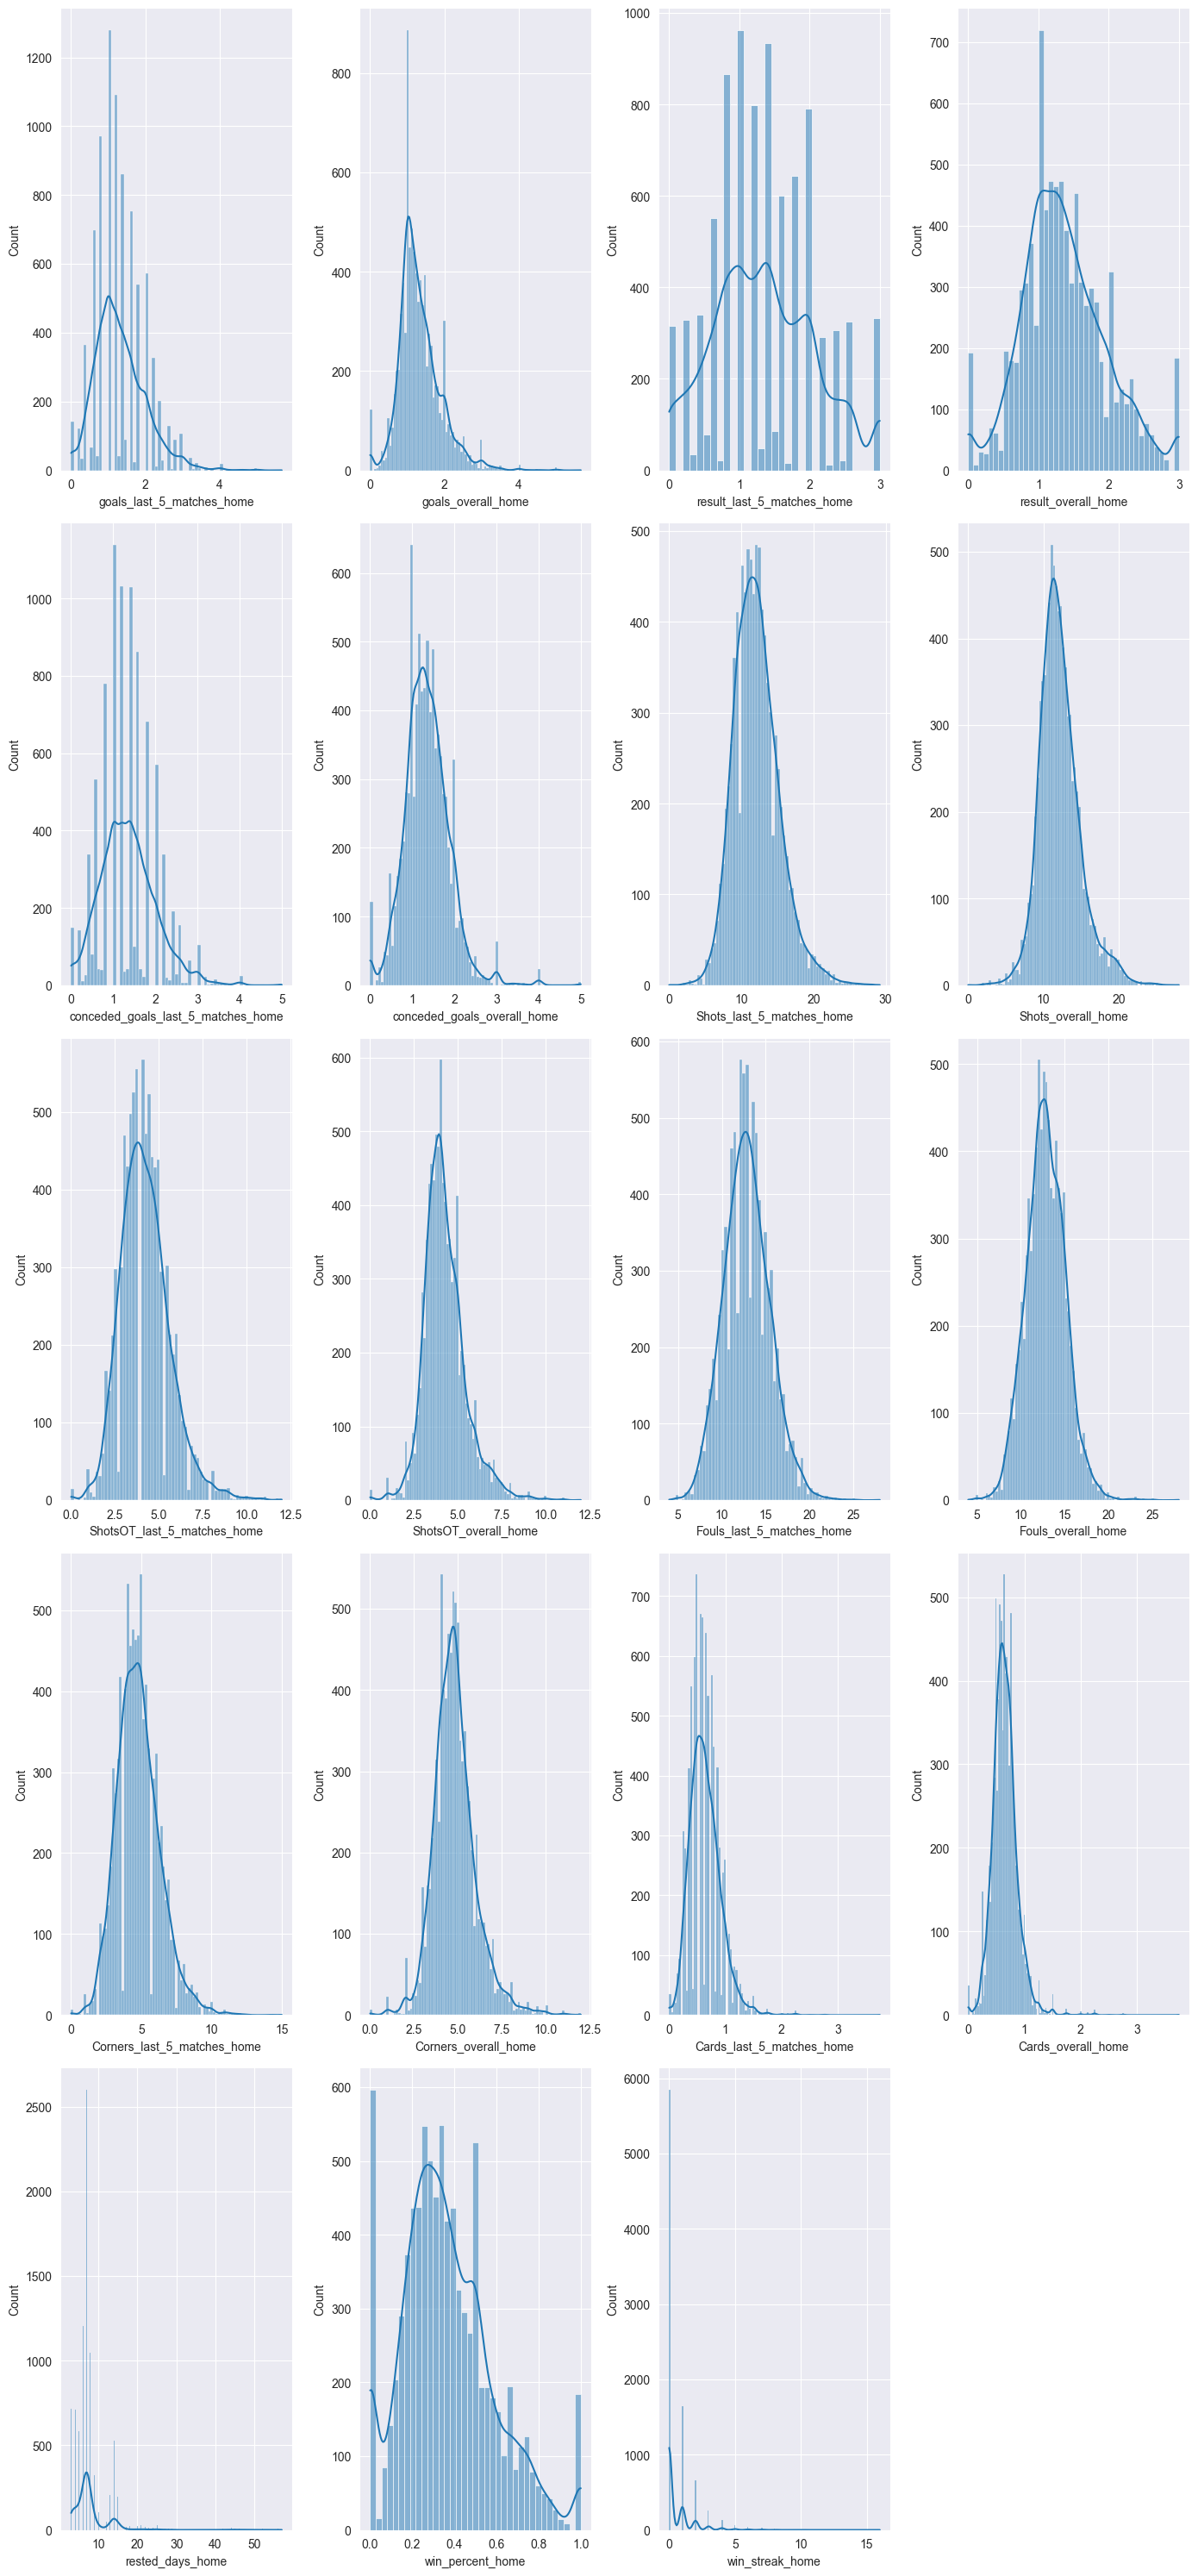

In [65]:
print('Home Team Features')
plt.figure(figsize=(14,30))
for i,col in enumerate (home_features):
    plt.subplot(5,4,i+1)
    sns.histplot(x=col, data=dataset, kde=True)
plt.tight_layout()
plt.show()

Away Team Features


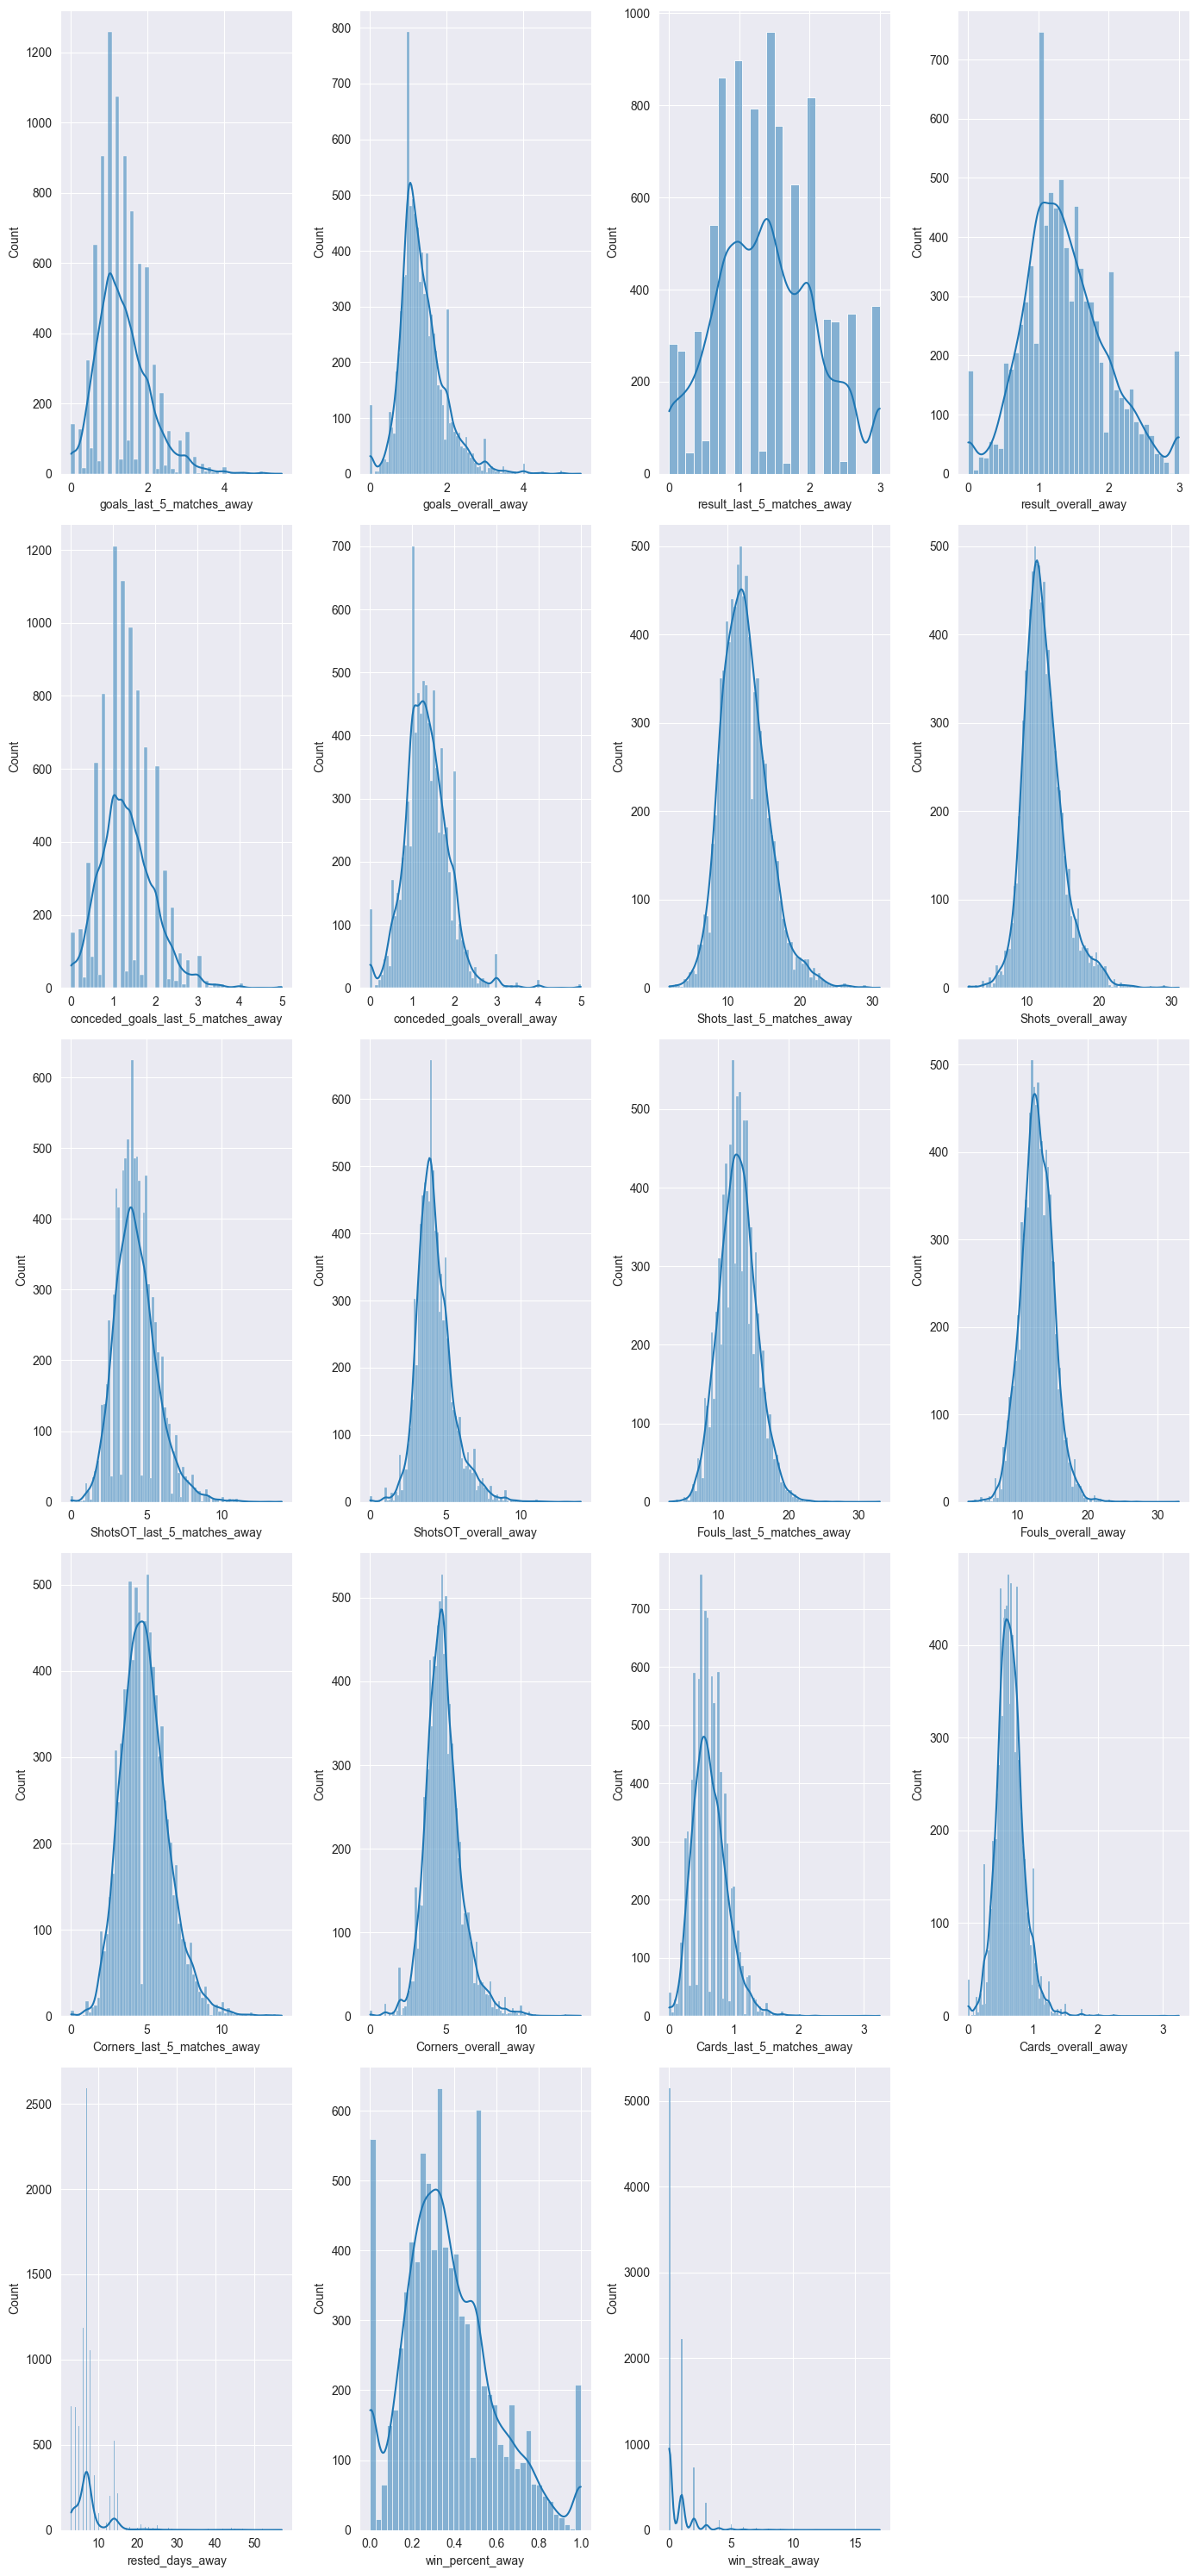

In [66]:
print('Away Team Features')
plt.figure(figsize=(14,30))
for i,col in enumerate (away_features):
    plt.subplot(5,4,i+1)
    sns.histplot(x=col, data=dataset, kde=True)
plt.tight_layout()
plt.show()

In [75]:
palette = ["#FF0000", "#00FF00", "#0000FF"]

#### We can notice the presence of some features that are able of separating between the different classes.

Home Team Features / target


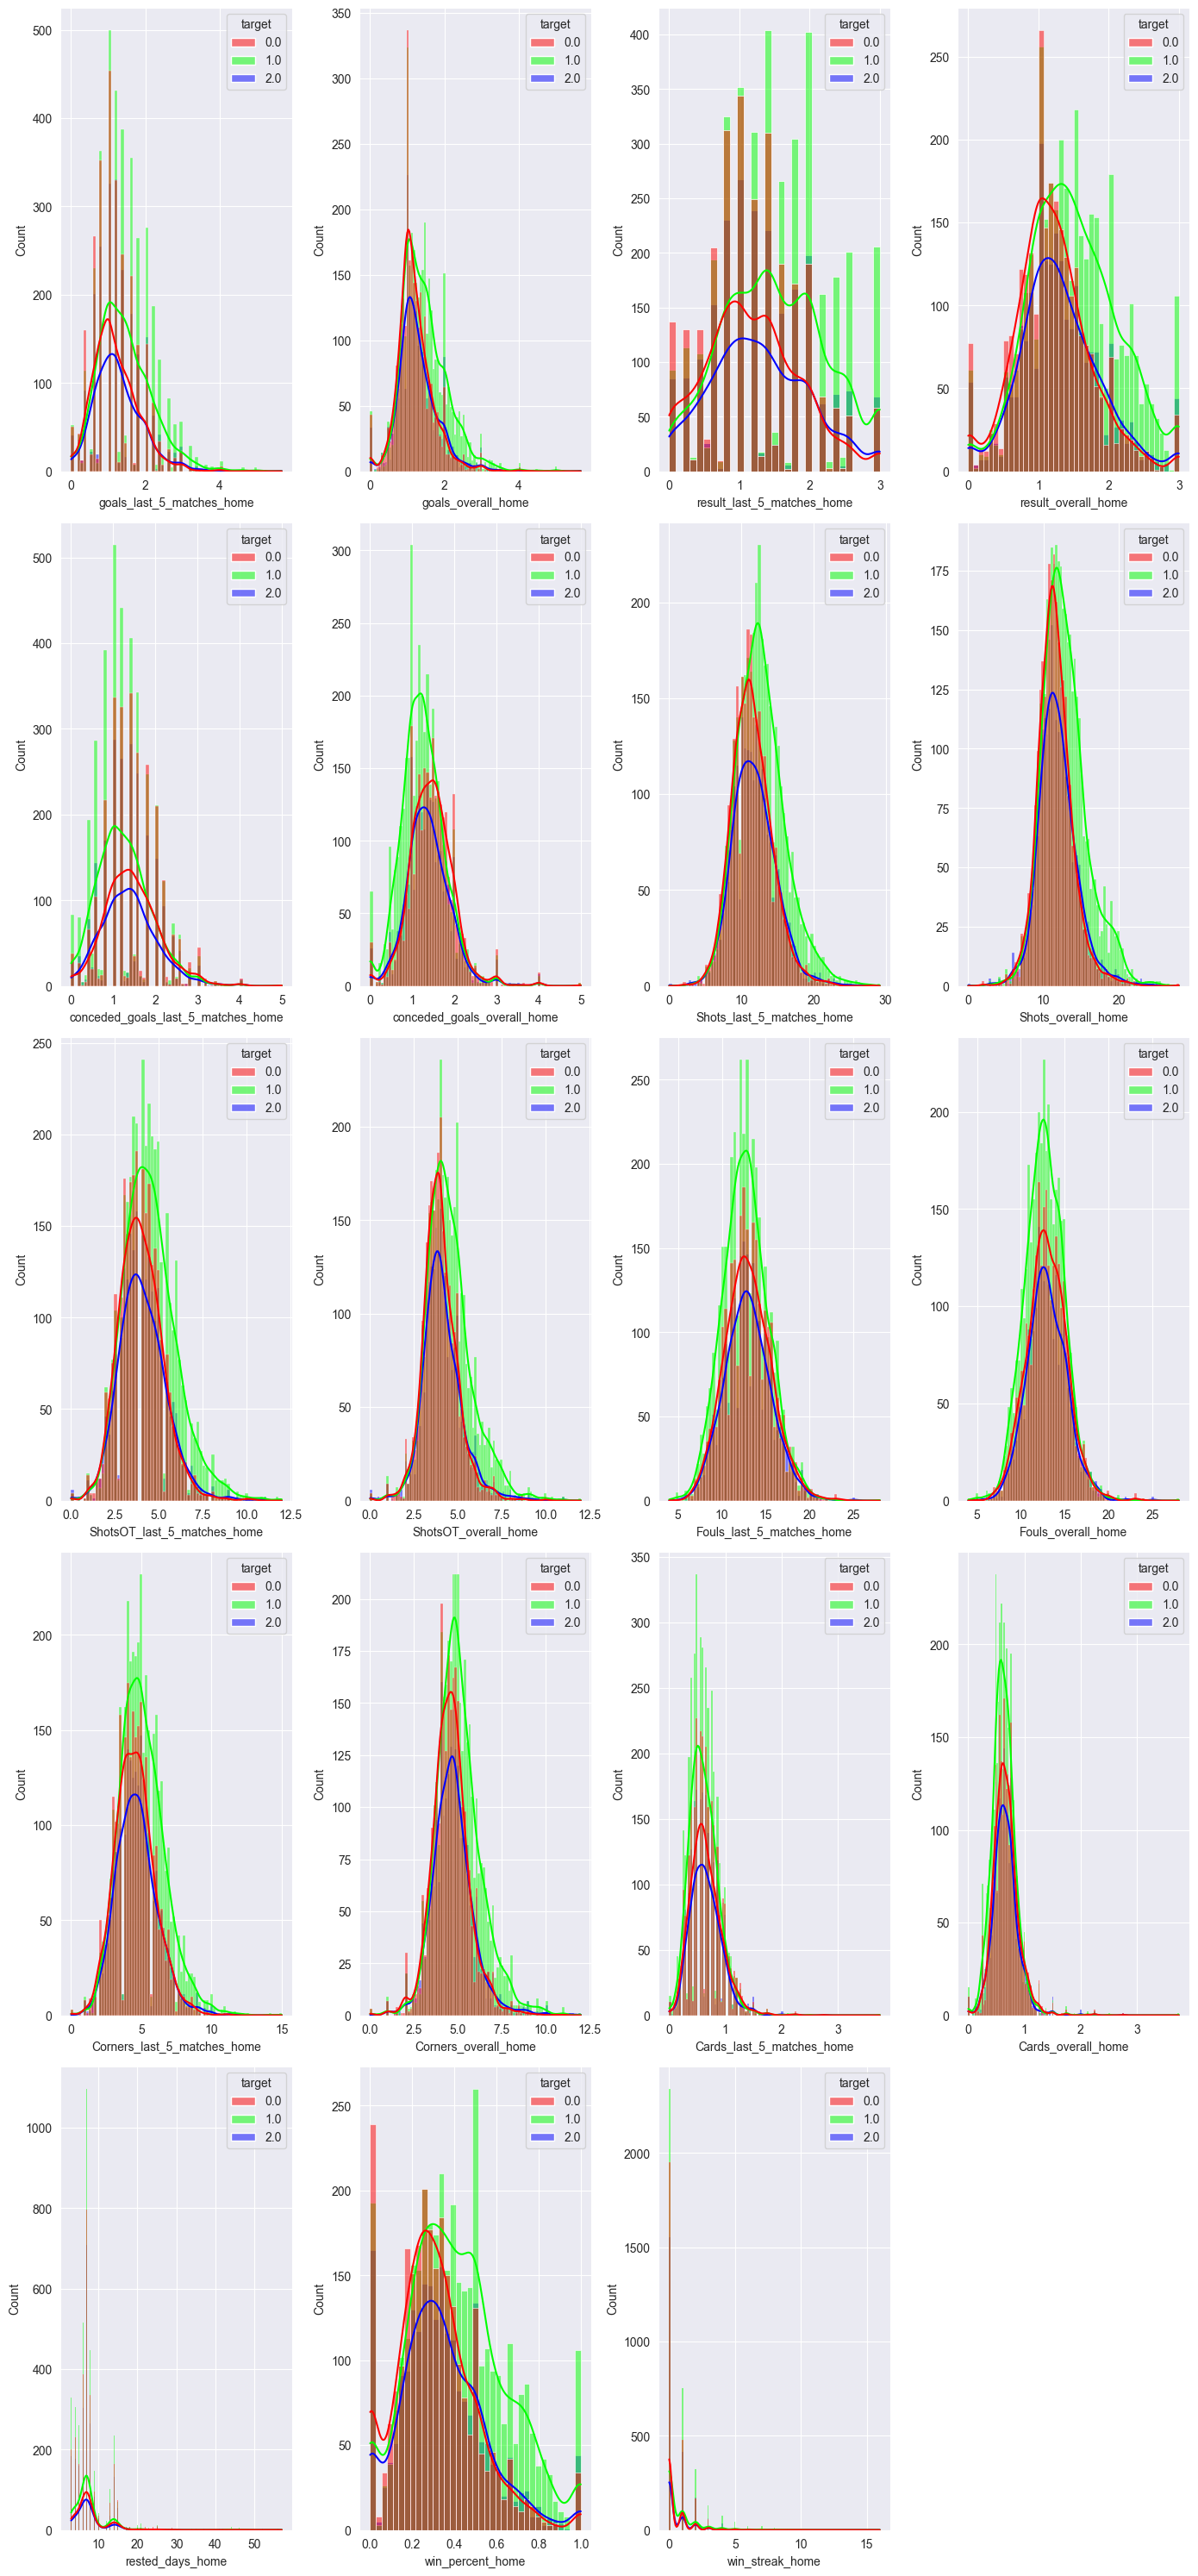

In [76]:
print('Home Team Features / target')
plt.figure(figsize=(14,30))
for i,col in enumerate (home_features):
    plt.subplot(5,4,i+1)
    sns.histplot(x=col, data=dataset,hue='target', kde=True,palette=palette)
plt.tight_layout()
plt.show()

Away Team Features / target


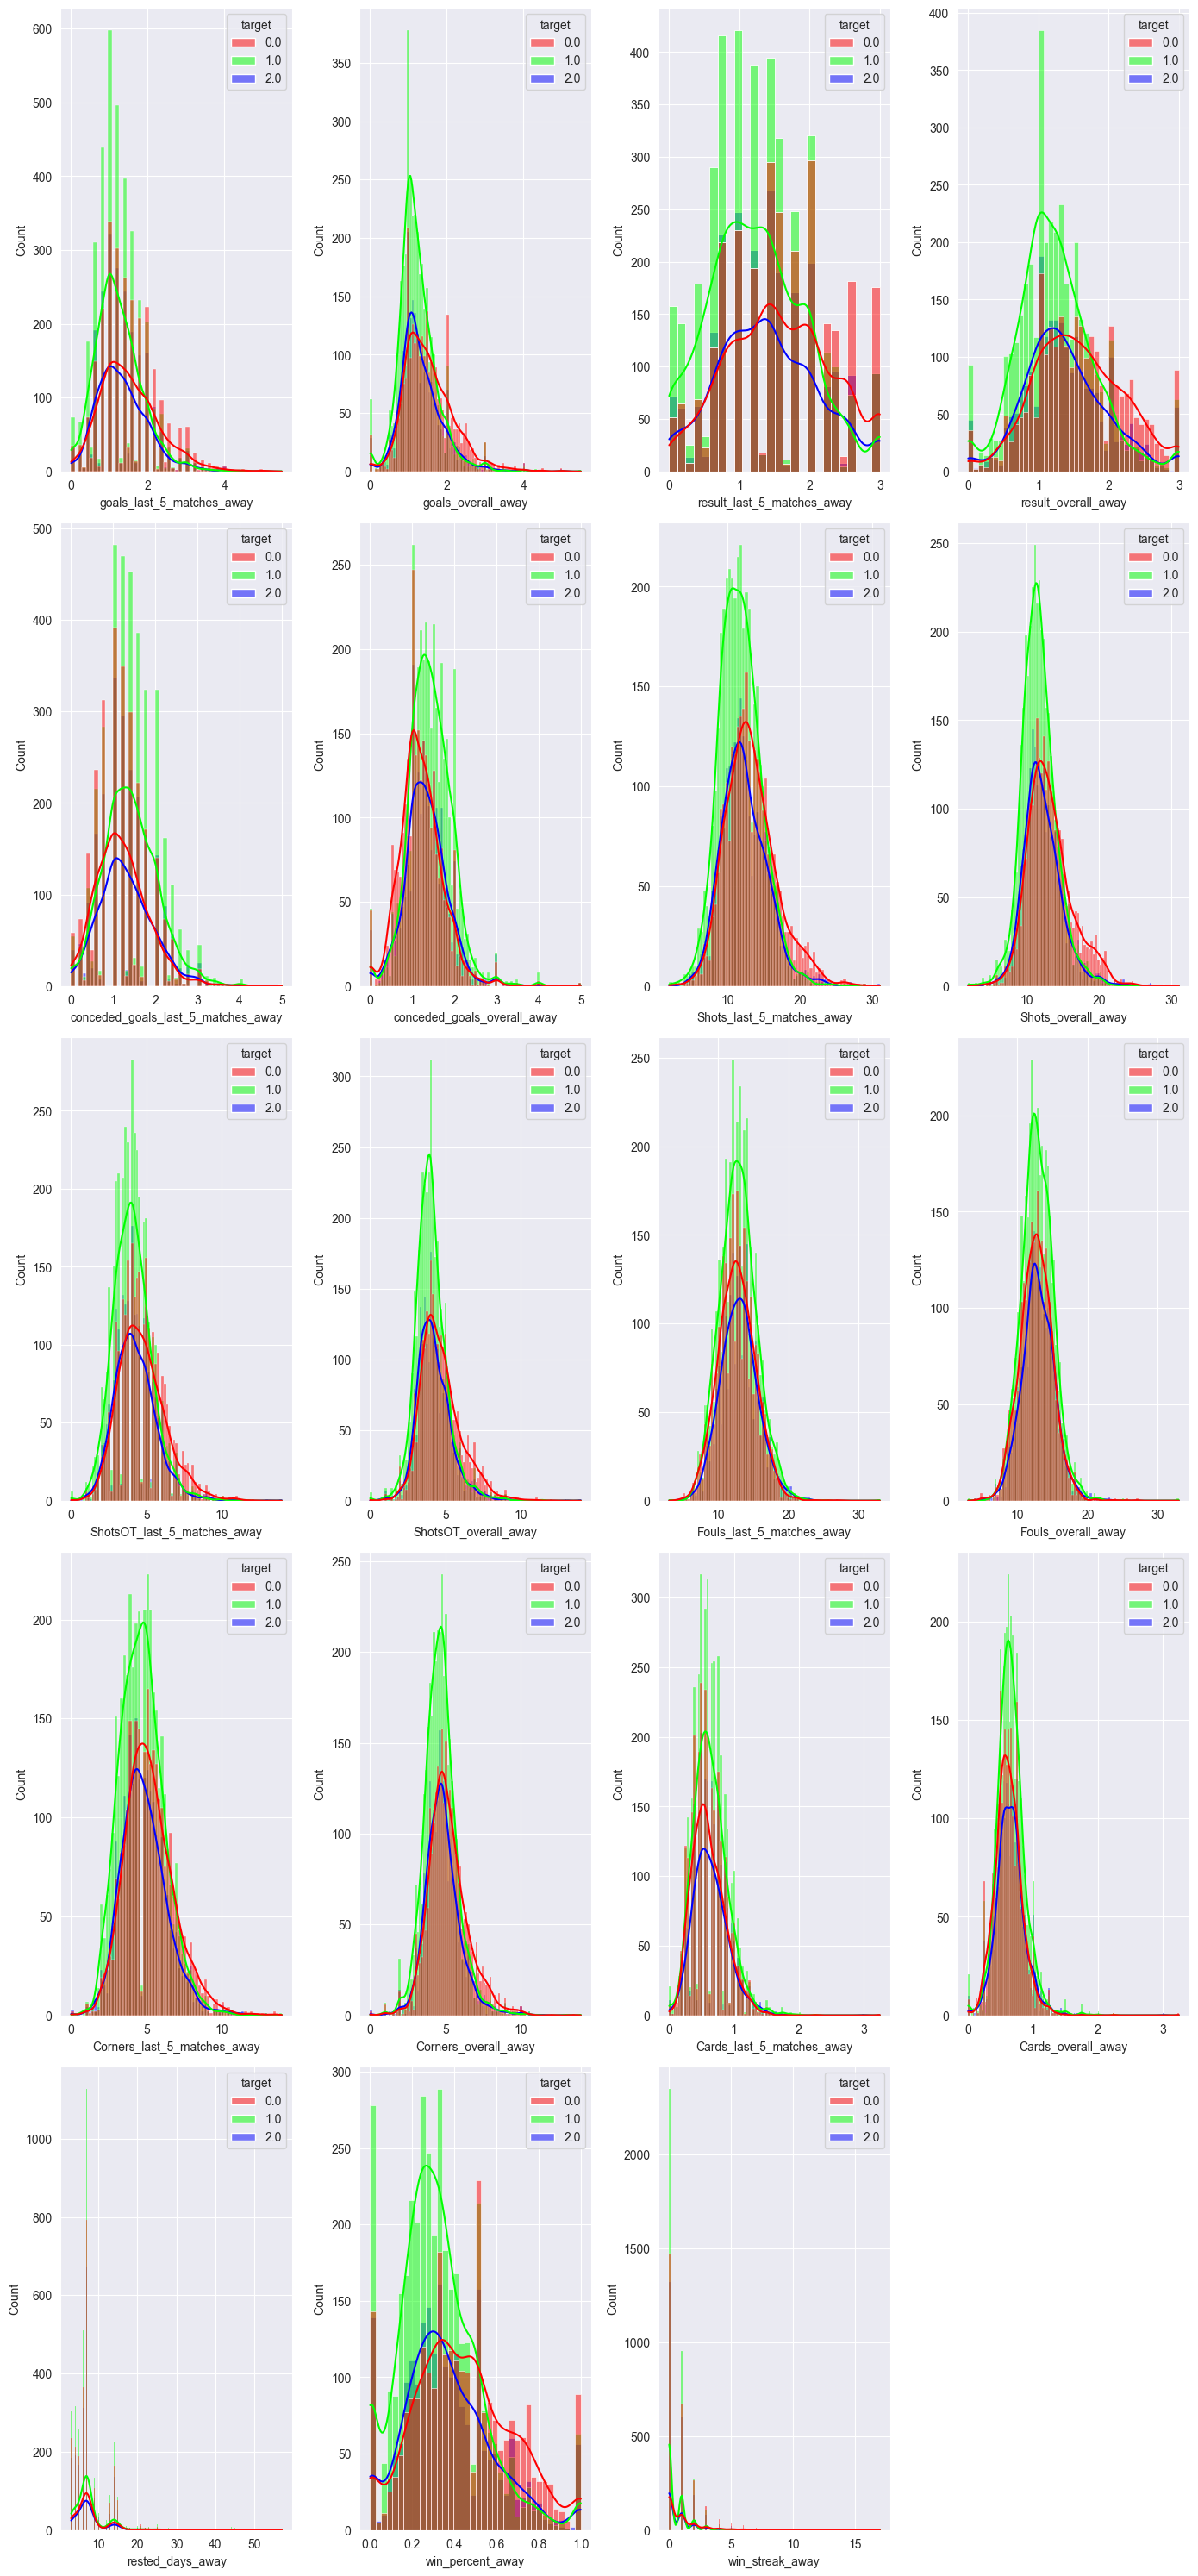

In [78]:
print('Away Team Features / target')
plt.figure(figsize=(14,30))
for i,col in enumerate (away_features):
    plt.subplot(5,4,i+1)
    sns.histplot(x=col, data=dataset,hue='target', kde=True,palette=palette)
plt.tight_layout()
plt.show()

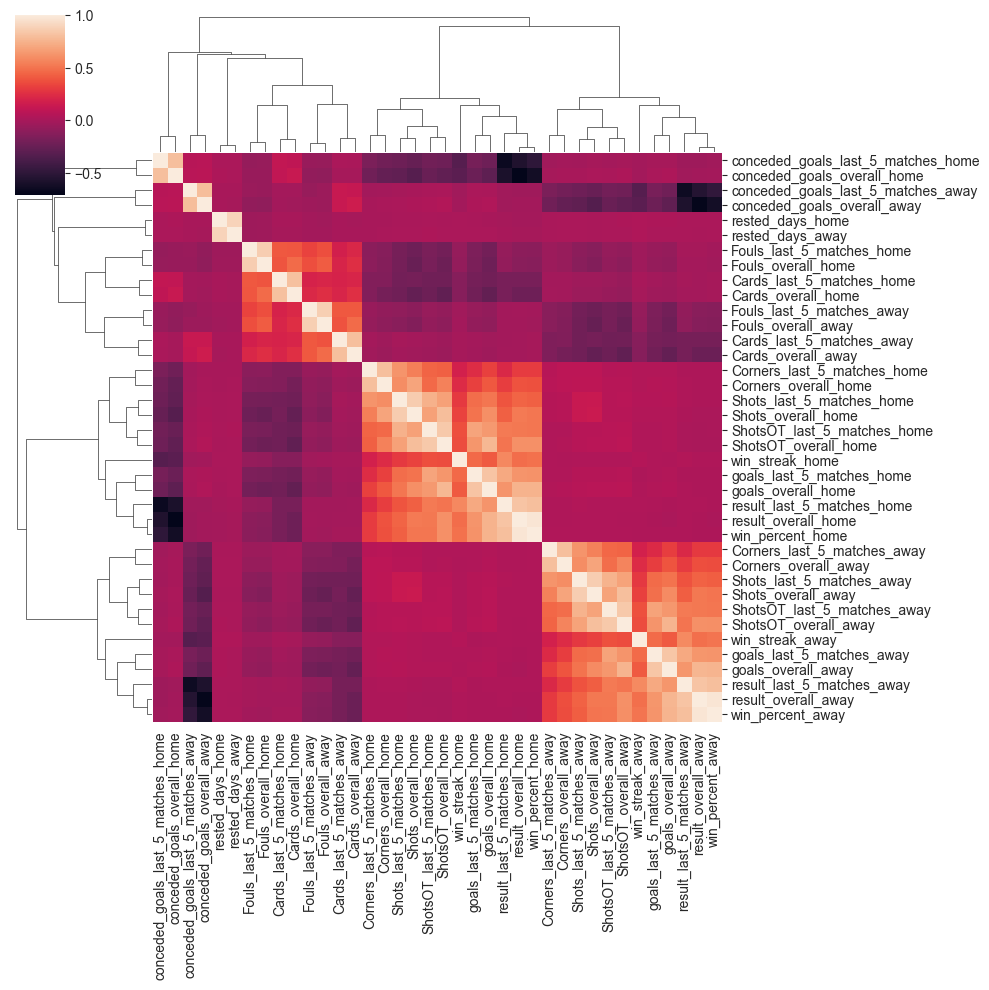

In [80]:
sns.clustermap(dataset[features].corr())

#### From those plots , we can notice :
- The presence of outliers that we will have to deal with.
- Contrast in feature distributions across classes.

Home Team Features


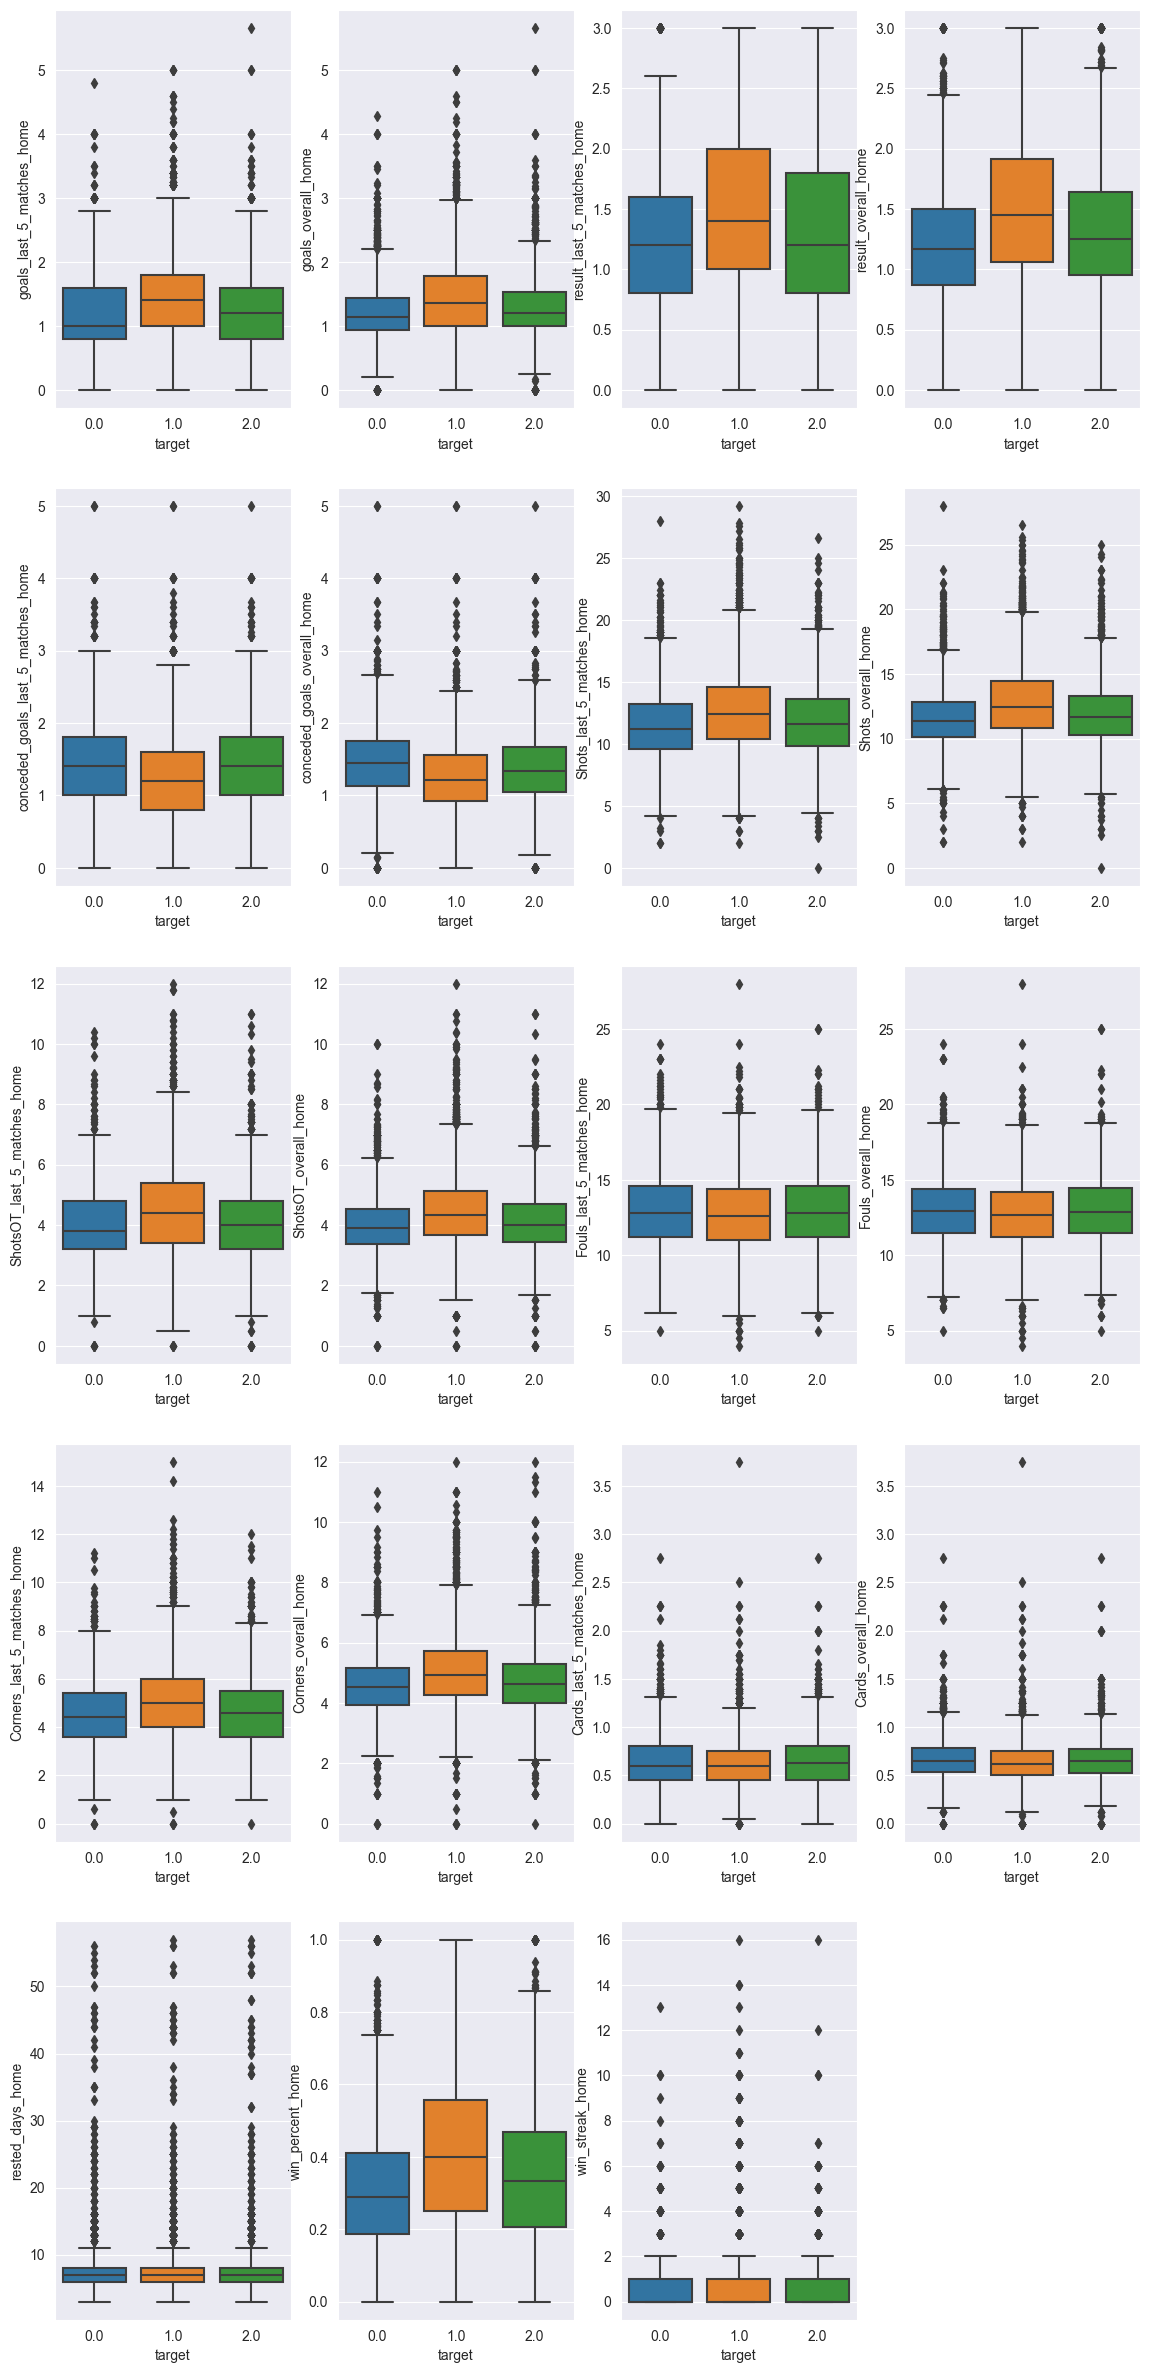

In [81]:
print('Home Team Features')
plt.figure(figsize=(14,30))
for i,col in enumerate (home_features):
    plt.subplot(5,4,i+1)
    sns.boxplot(x='target',y=col, data=dataset)
plt.show()

Away Team Features


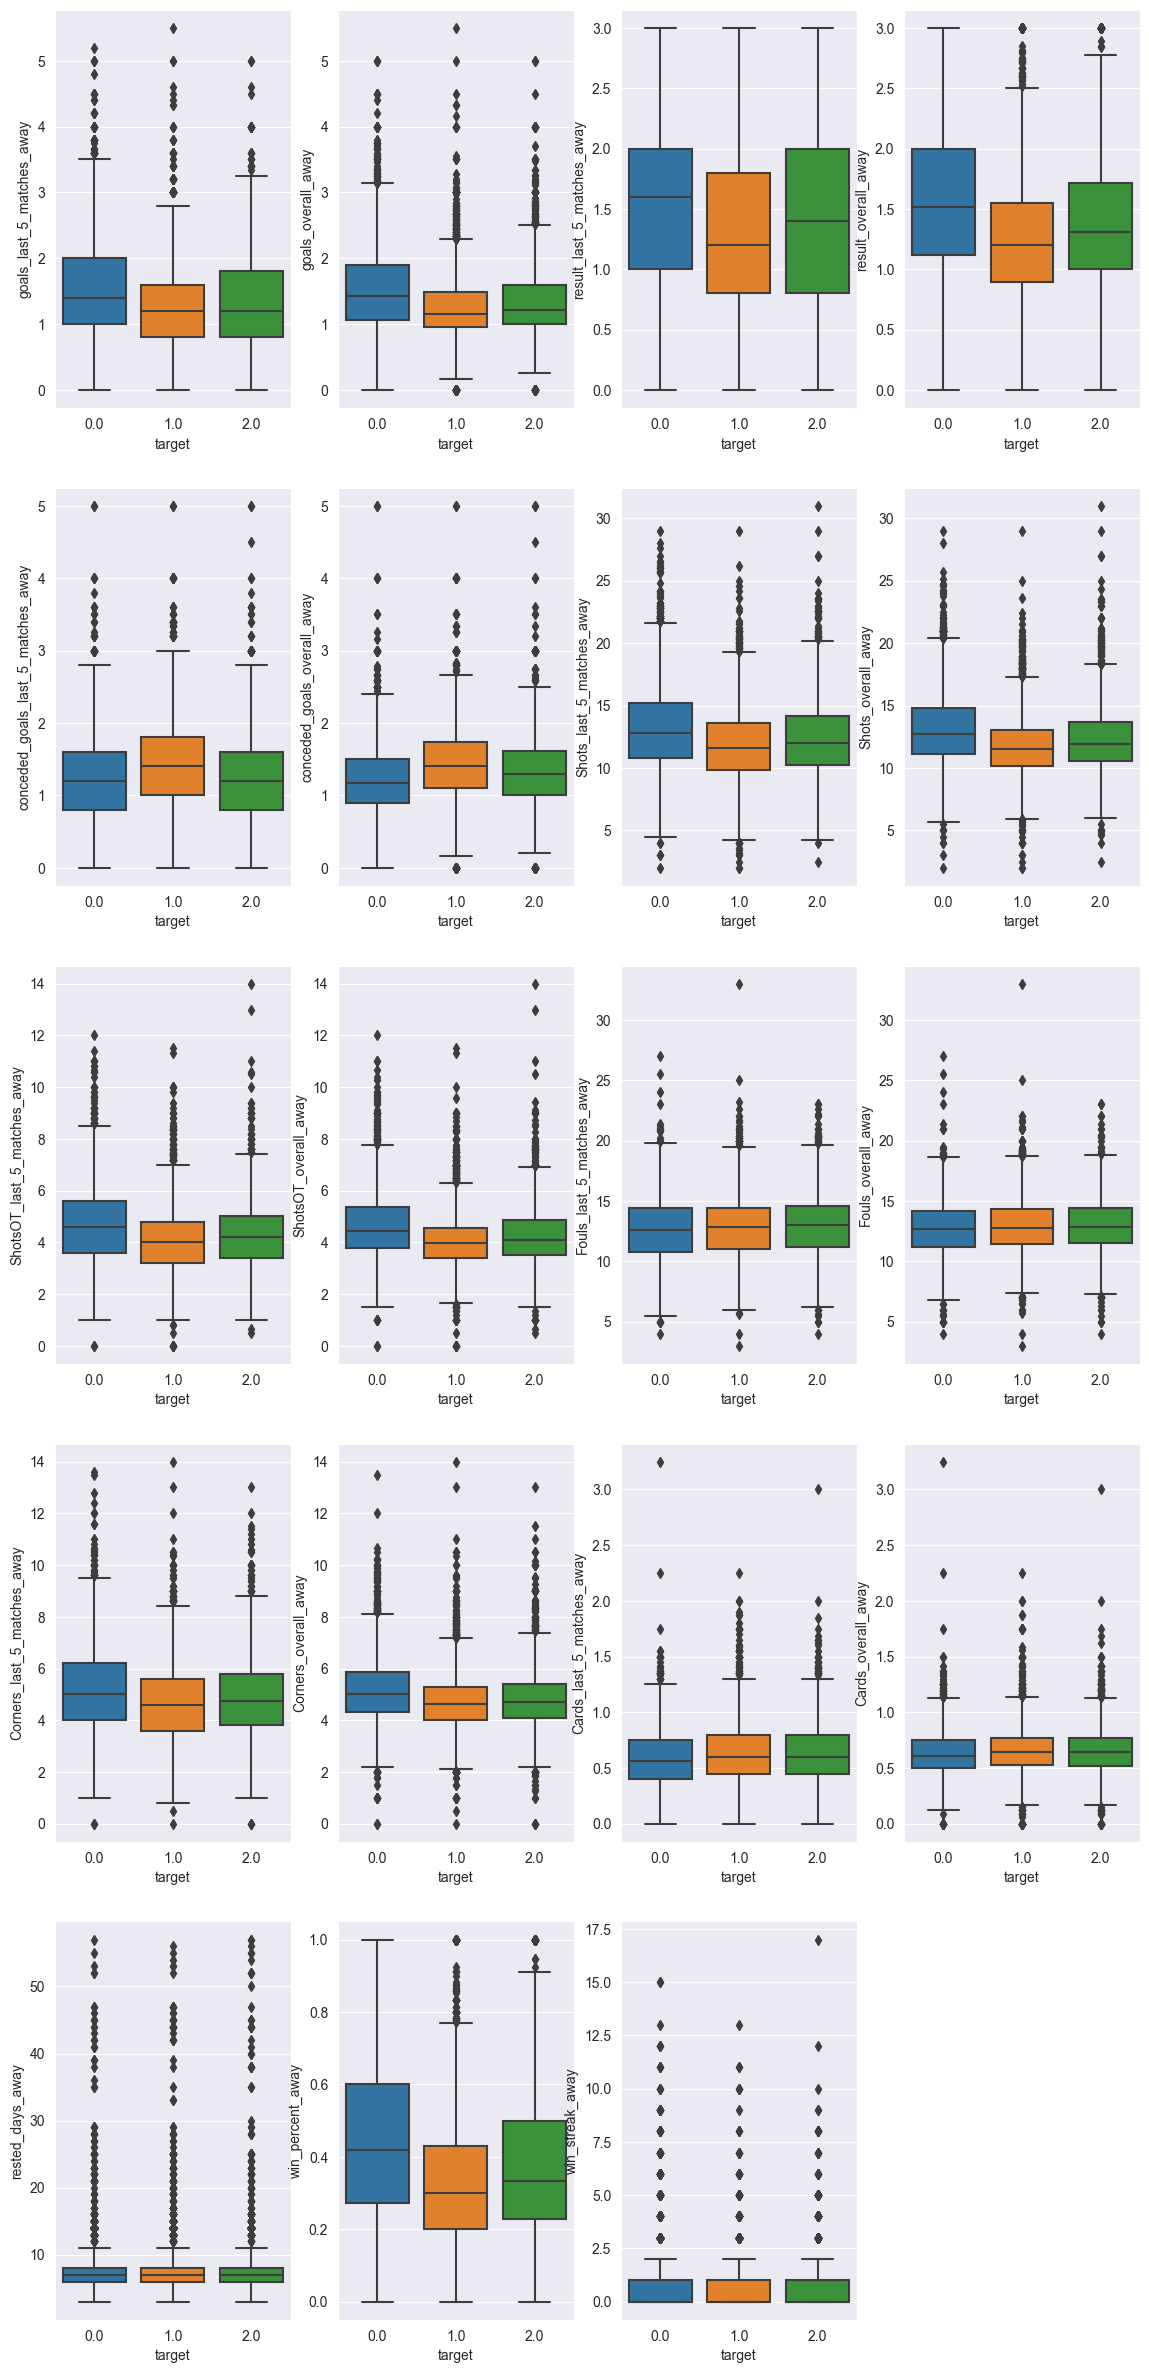

In [82]:
print('Away Team Features')
plt.figure(figsize=(14,30))
for i,col in enumerate (away_features):
    plt.subplot(5,4,i+1)
    sns.boxplot(x='target',y=col, data=dataset)
plt.show()